# Dealing with Bias



In [1]:
import pandas as pd
import numpy as np


In [2]:
# Data set is containted in the same path, in the archive folder
dataset = pd.read_csv("archive/creditcard.csv")

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:

import matplotlib.pyplot as plt

0    284315
1       492
Name: Class, dtype: int64
as a percentage of the whole dataset
0    99.827251
1     0.172749
Name: Class, dtype: float64


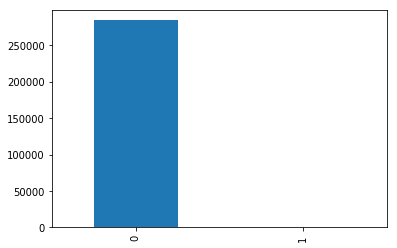

In [5]:
# Having a look at how many samples are fraudulent and how many are nnot

#flag = dataset.class.unique()
fig, ax = plt.subplots()
print(dataset.Class.value_counts())
print("as a percentage of the whole dataset")
print((dataset.Class.value_counts()*100)/ len(dataset))
dataset.Class.value_counts().plot(ax=ax, kind='bar')

##### Looking at how skewed the dataset is, is worth noting. This will give us even more motivation for cross validation, when we come to write about it

## Attempting Undersampleing
To reduce bias, with this technique, we reduce the number of samples in the most domainat(ie majority) class.

In [6]:
def rands(row):
    if( row ==0):
        return  np.random.uniform(low=0, high=0.999)
    else:
        #print("0")
        return 0
    

In [7]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
dataset['rand'] =dataset.Class.apply(rands)

In [ ]:
dataset.rand.plot()

In [14]:


dataUnder = dataset.drop(dataset[(dataset.rand > 0.001) ].index)


1    492
0    256
Name: Class, dtype: int64
as a percentage of the whole dataset
1    65.775401
0    34.224599
Name: Class, dtype: float64


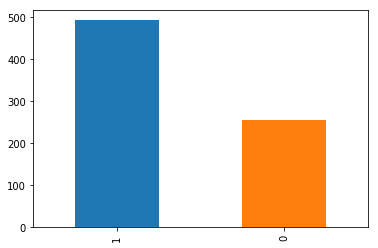

In [15]:
fig, ax = plt.subplots()
print(dataUnder.Class.value_counts())
print("as a percentage of the whole dataset")
print((dataUnder.Class.value_counts()*100)/ len(dataUnder))
dataUnder.Class.value_counts().plot(ax=ax, kind='bar')